In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
# Load Top Goals (Assist info is here)
top_goals = pd.read_excel("Top Goals.xlsx", engine="openpyxl")

print("Shape:", top_goals.shape)
top_goals.head()


Shape: (324, 19)


,Season,Rank,Player,Club,Goals,IsTop10,Position,Age,Appearances,Goals_prev_season,Assists,Penalty_Goals,Non-Penalty_Goals,Goals_per_90,Big_6_Club_Feature,Club_League_Rank,Club_Total_Goals,League_Goals_per_Match,Games_in_Season
0,2023-24,1,Erling Haaland,Manchester City,27,1,Forward,23,31,36.0,6.0,1.0,26,0.85,1.0,1,96,2.83,38.0
1,2023-24,2,Cole Palmer,Chelsea,22,1,Attacking Midfielder,22,33,3.0,11.0,9.0,13,0.61,1.0,6,77,2.83,38.0
2,2023-24,3,Alexander Isak,Newcastle United,21,1,Forward,24,30,10.0,2.0,5.0,16,0.76,0.0,7,85,2.83,38.0
3,2023-24,4,Ollie Watkins,Aston Villa,19,1,Forward,28,37,15.0,13.0,0.0,19,0.51,0.0,4,76,2.83,38.0
4,2023-24,4,Dominic Solanke,AFC Bournemouth,19,1,Forward,26,38,6.0,3.0,1.0,18,0.50,0.0,12,54,2.83,38.0


In [3]:
top_goals.info()
top_goals.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  324 non-null    object 
 1   Rank                    324 non-null    int64  
 2   Player                  324 non-null    object 
 3   Club                    324 non-null    object 
 4   Goals                   324 non-null    int64  
 5   IsTop10                 324 non-null    int64  
 6   Position                324 non-null    object 
 7   Age                     324 non-null    int64  
 8   Appearances             324 non-null    int64  
 9   Goals_prev_season       209 non-null    float64
 10  Assists                 96 non-null     float64
 11  Penalty_Goals           323 non-null    float64
 12  Non-Penalty_Goals       324 non-null    int64  
 13  Goals_per_90            324 non-null    float64
 14  Big_6_Club_Feature      324 non-null    fl

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Season,324,32,1992-93,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank,324.0,NaN,NaN,NaN,5.219136,2.770612,1.0,3.0,5.0,7.25,10.0
Player,324,154,Alan Shearer,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,324,46,Arsenal,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals,324.0,NaN,NaN,NaN,17.688272,4.873481,9.0,14.0,17.0,20.0,36.0
IsTop10,324.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Position,324,4,Forward,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,324.0,NaN,NaN,NaN,26.435185,3.409892,18.0,24.0,26.0,29.0,37.0
Appearances,324.0,NaN,NaN,NaN,33.898148,4.442839,13.0,32.0,35.0,37.0,42.0
Goals_prev_season,209.0,NaN,NaN,NaN,15.38756,6.851308,1.0,11.0,15.0,19.0,36.0


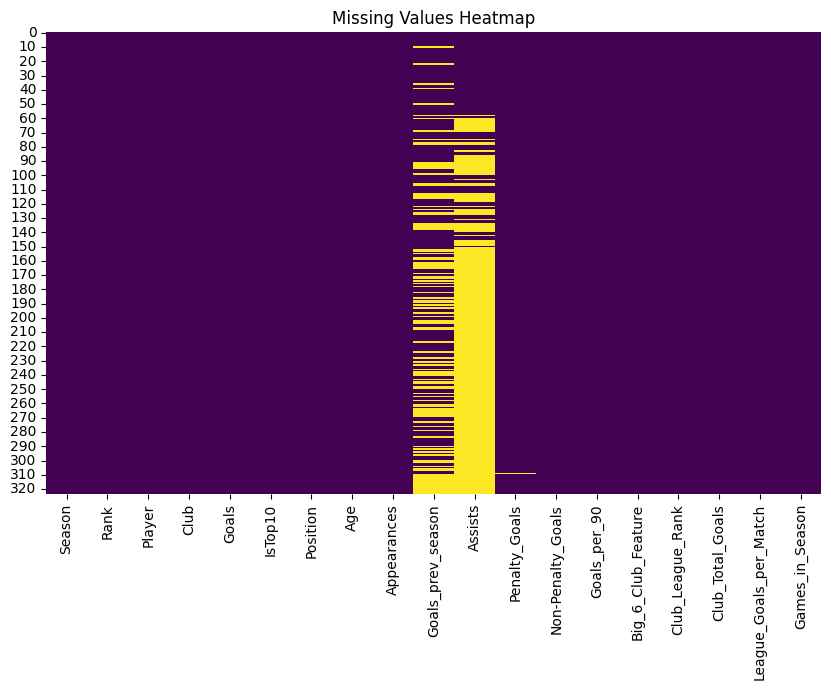

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(top_goals.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
if "IsTop10" in top_goals.columns:
    top_goals.drop(columns=["IsTop10"], inplace=True)

print("Columns after dropping:", top_goals.columns.tolist())


Columns after dropping: ['Season', 'Rank', 'Player', 'Club', 'Goals', 'Position', 'Age', 'Appearances', 'Goals_prev_season', 'Assists', 'Penalty_Goals', 'Non-Penalty_Goals', 'Goals_per_90', 'Big_6_Club_Feature', 'Club_League_Rank', 'Club_Total_Goals', 'League_Goals_per_Match', 'Games_in_Season']


In [8]:
import numpy as np
import pandas as pd

#  handle numeric + categorical NaN safely ---

# Try coercion: turn numeric-like strings into real numbers
for col in top_goals.columns:
    if top_goals[col].dtype == 'object':
        cleaned = top_goals[col].astype(str).str.replace(',', '').str.strip()
        cleaned = cleaned.str.replace(r'[^0-9\.\-]', '', regex=True)
        coerced = pd.to_numeric(cleaned, errors='coerce')
        if coerced.notnull().sum() >= (0.5 * len(top_goals)):
            top_goals[col] = coerced  # replace column safely

# Fill numeric NaN with median
for col in top_goals.select_dtypes(include=[np.number]).columns:
    median_val = top_goals[col].median()
    top_goals.loc[:, col] = top_goals[col].fillna(median_val)

# Fill categorical NaN with mode (or "Unknown" if no mode)
for col in top_goals.select_dtypes(include=['object']).columns:
    mode = top_goals[col].mode()
    fill_val = mode[0] if not mode.empty else "Unknown"
    top_goals.loc[:, col] = top_goals[col].fillna(fill_val)

print("✅ Missing values after Step 6:\n", top_goals.isnull().sum())


✅ Missing values after Step 6:
 Season                    0
Rank                      0
Player                    0
Club                      0
Goals                     0
Position                  0
Age                       0
Appearances               0
Goals_prev_season         0
Assists                   0
Penalty_Goals             0
Non-Penalty_Goals         0
Goals_per_90              0
Big_6_Club_Feature        0
Club_League_Rank          0
Club_Total_Goals          0
League_Goals_per_Match    0
Games_in_Season           0
dtype: int64


In [9]:
top_goals.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", top_goals.shape)


Shape after removing duplicates: (324, 18)


In [14]:
le = LabelEncoder()
if "player" in top_goals.columns:
    top_goals["player_encoded"] = le.fit_transform(top_goals["player"])

if "team" in top_goals.columns:
    top_goals["team_encoded"] = le.fit_transform(top_goals["team"])


In [15]:
if {"assists", "played"}.issubset(top_goals.columns):
    top_goals["assist_per_match"] = top_goals["assists"] / top_goals["played"].replace(0, np.nan)


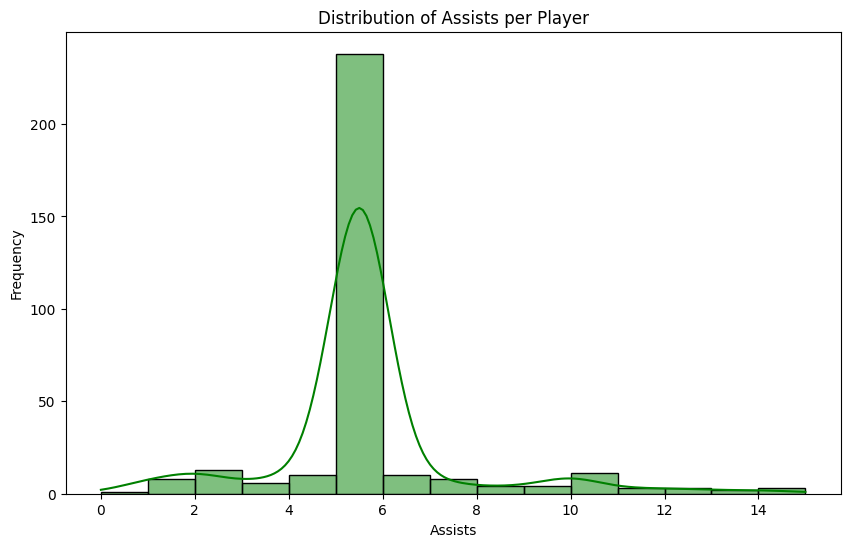

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(top_goals["Assists"], bins=15, kde=True, color="green")
plt.title("Distribution of Assists per Player")
plt.xlabel("Assists")
plt.ylabel("Frequency")
plt.show()


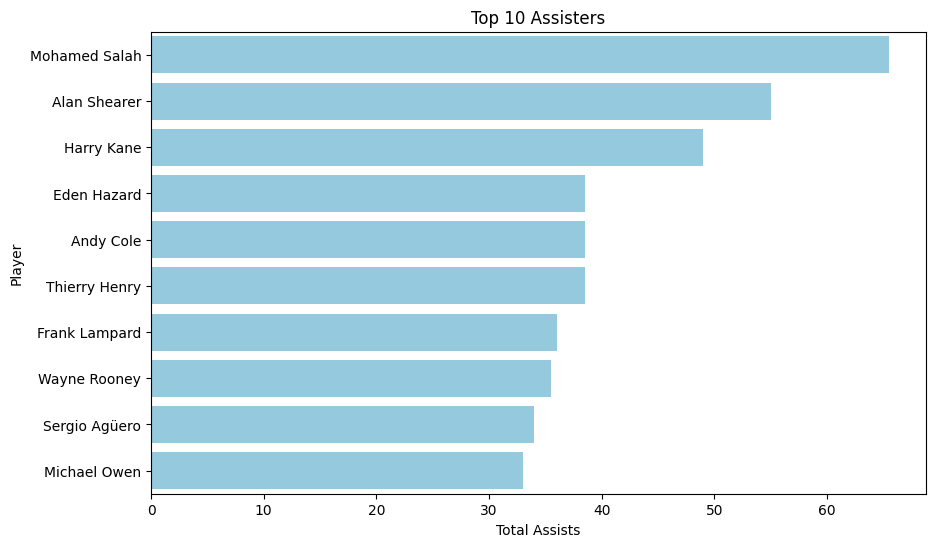

In [49]:
#  Top 10 Assisters
top_10_assisters = top_goals.groupby("Player")["Assists"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_assisters.values, y=top_10_assisters.index, color="skyblue")
plt.title("Top 10 Assisters")
plt.xlabel("Total Assists")
plt.ylabel("Player")
plt.show()


✅ Using column 'Assists' for plotting assists data


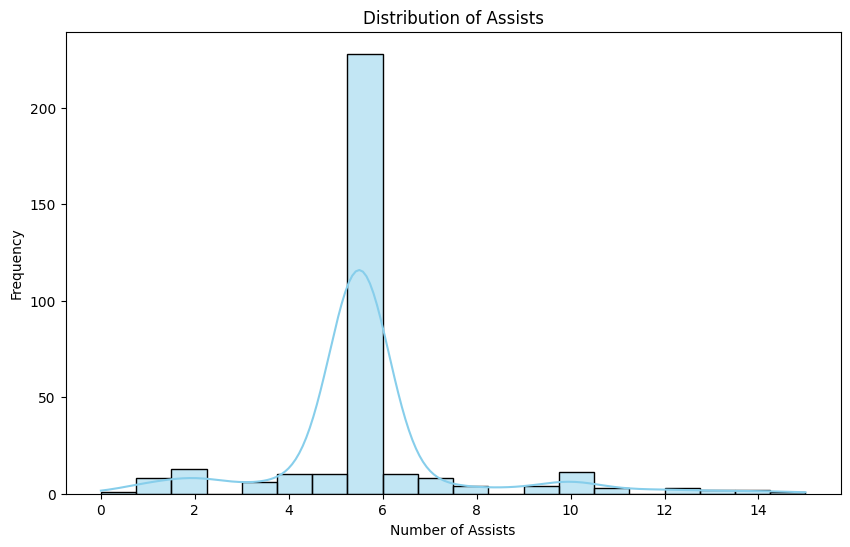

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Exploratory plots for Assists ---

# Try to auto-detect assists column
assist_col = None
for col in top_goals.columns:
    if "assist" in col.lower():   # check case-insensitive
        assist_col = col
        break

if assist_col:
    print(f"✅ Using column '{assist_col}' for plotting assists data")

    # Histogram of assists
    plt.figure(figsize=(10, 6))
    sns.histplot(top_goals[assist_col], bins=20, kde=True, color='skyblue')
    plt.title("Distribution of Assists")
    plt.xlabel("Number of Assists")
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot by player position (if column exists)
    if 'position' in top_goals.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='position', y=assist_col, data=top_goals)
        plt.title("Boxplot of Assists by Player Position")
        plt.xlabel("Player Position")
        plt.ylabel("Assists")
        plt.show()

    # Top 10 teams by assists (if 'team' column exists)
    if 'team' in top_goals.columns:
        plt.figure(figsize=(12, 6))
        top_teams = top_goals.groupby('team')[assist_col].sum().sort_values(ascending=False).head(10)
        sns.barplot(x=top_teams.index, y=top_teams.values, palette="viridis")
        plt.title("Top 10 Teams by Total Assists")
        plt.xticks(rotation=45)
        plt.ylabel("Total Assists")
        plt.show()

else:
    print("⚠️ No assists-related column found in dataset. Please check column names.")
    print("Available columns:", top_goals.columns.tolist())


In [18]:
import numpy as np

# Step 11: Define Features (X) and Target (y) with auto-detection
assist_col = None
for col in top_goals.columns:
    if "assist" in col.lower():   # case-insensitive search
        assist_col = col
        break

if assist_col:
    X = top_goals.select_dtypes(include=np.number).drop(columns=[assist_col], errors="ignore")
    y = top_goals[assist_col]

    print(f"✅ Using '{assist_col}' as the target column")
    print("Feature Shape:", X.shape, "| Target Shape:", y.shape)
else:
    print("⚠️ No assists-related column found in dataset. Please check column names.")
    print("Available columns:", top_goals.columns.tolist())


✅ Using 'Assists' as the target column
Feature Shape: (324, 13) | Target Shape: (324,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training Samples:", X_train.shape[0], "Testing Samples:", X_test.shape[0])


Training Samples: 259 Testing Samples: 65


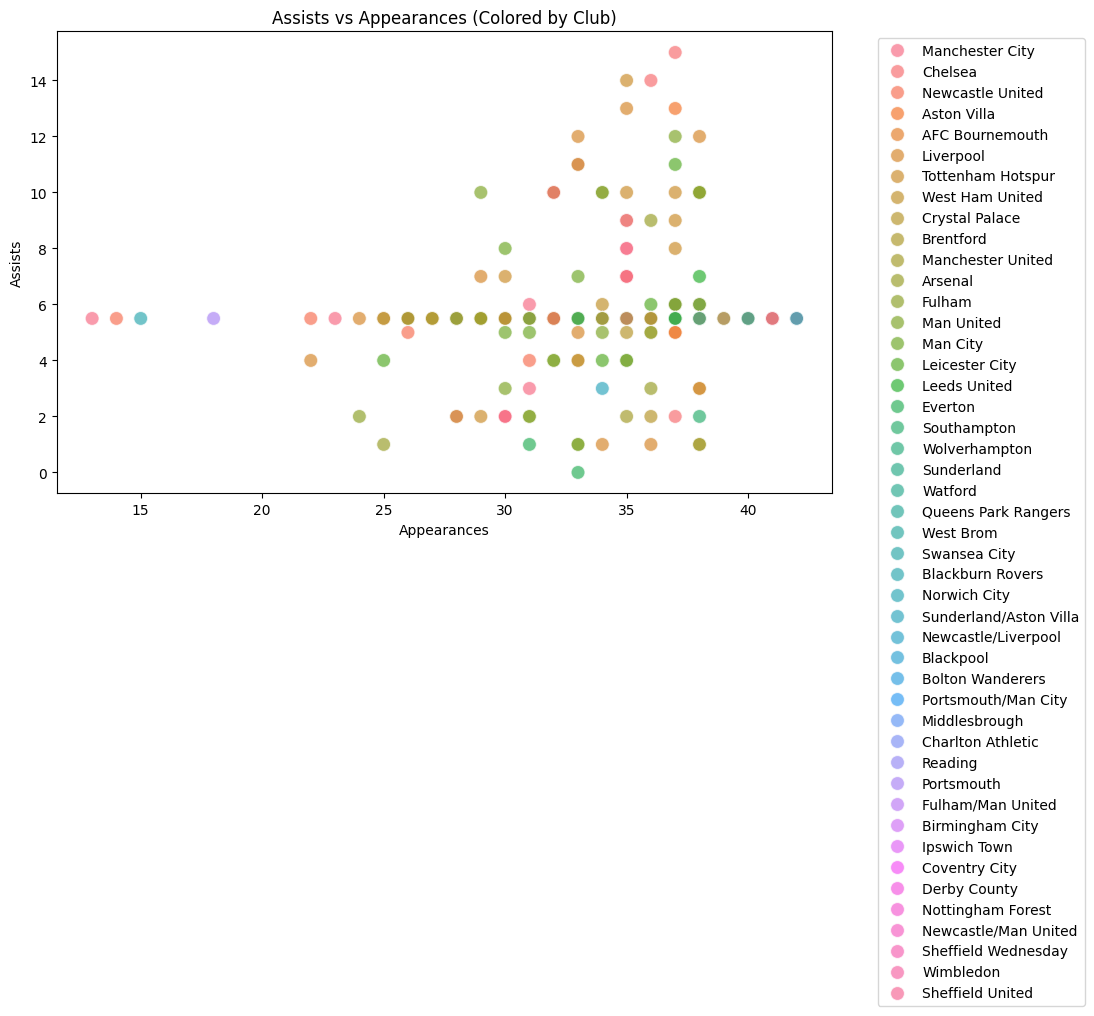

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Appearances", y="Assists", hue="Club", data=top_goals, s=100, alpha=0.7)
plt.title("Assists vs Appearances (Colored by Club)")
plt.xlabel("Appearances")
plt.ylabel("Assists")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [21]:
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


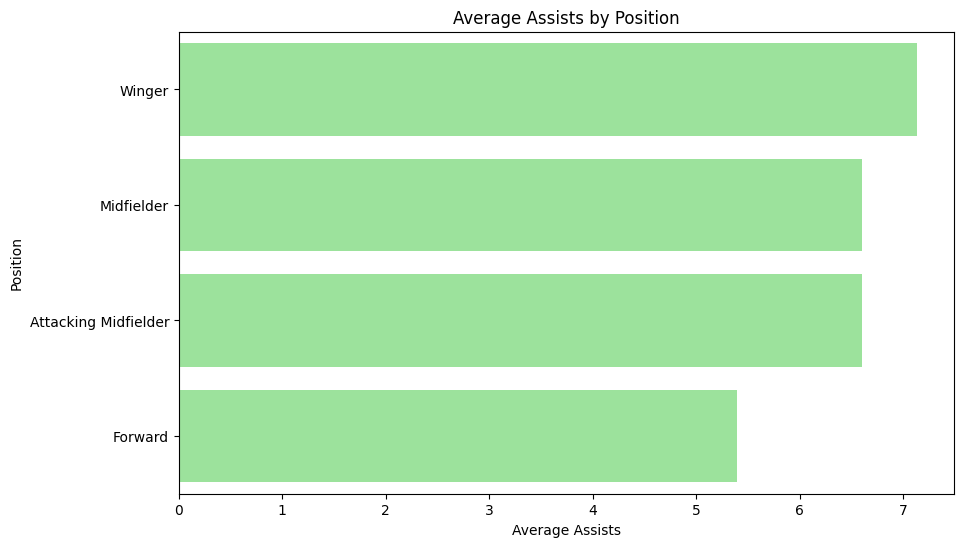

In [52]:
#  Average Assists by Player Position
position_assists = top_goals.groupby("Position")["Assists"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=position_assists.values, y=position_assists.index, color="lightgreen")
plt.title("Average Assists by Position")
plt.xlabel("Average Assists")
plt.ylabel("Position")
plt.show()


In [23]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


In [24]:
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return pd.Series([mae, mse, rmse, r2],
                     index=["MAE","MSE","RMSE","R2"],
                     name=name)


In [25]:
results = pd.DataFrame()
results = pd.concat([results, evaluate_model(y_test, y_pred_lr, "Linear Regression")], axis=1)
results = pd.concat([results, evaluate_model(y_test, y_pred_dt, "Decision Tree")], axis=1)
results = pd.concat([results, evaluate_model(y_test, y_pred_rf, "Random Forest")], axis=1)
results = pd.concat([results, evaluate_model(y_test, y_pred_gb, "Gradient Boosting")], axis=1)

results.T


,MAE,MSE,RMSE,R2
Linear Regression,1.314428,5.516557,2.348735,0.027600
Decision Tree,1.497474,9.014506,3.002417,-0.588981
Random Forest,1.189846,5.962926,2.441910,-0.051081
Gradient Boosting,1.291192,6.093727,2.468547,-0.074137


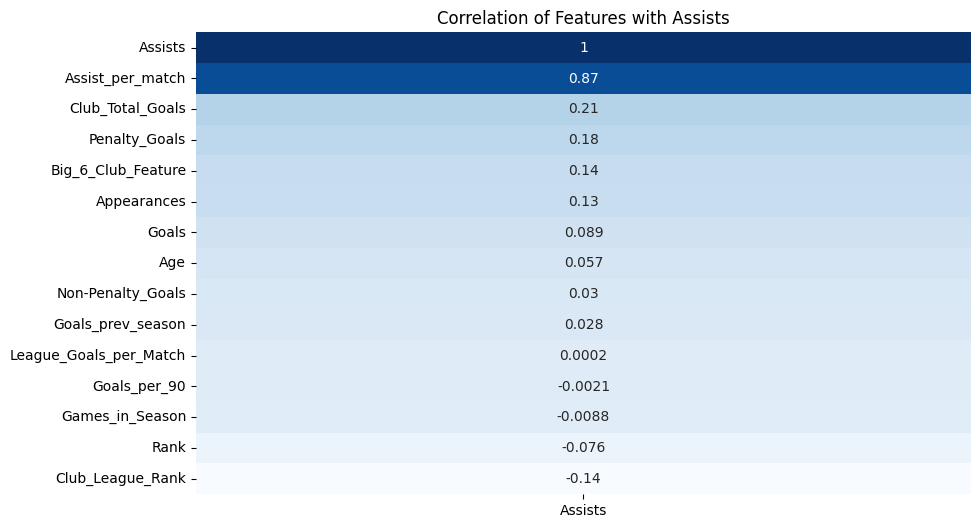

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(top_goals.corr(numeric_only=True)[["Assists"]].sort_values(by="Assists", ascending=False),
            annot=True, cmap="Blues", cbar=False)
plt.title("Correlation of Features with Assists")
plt.show()


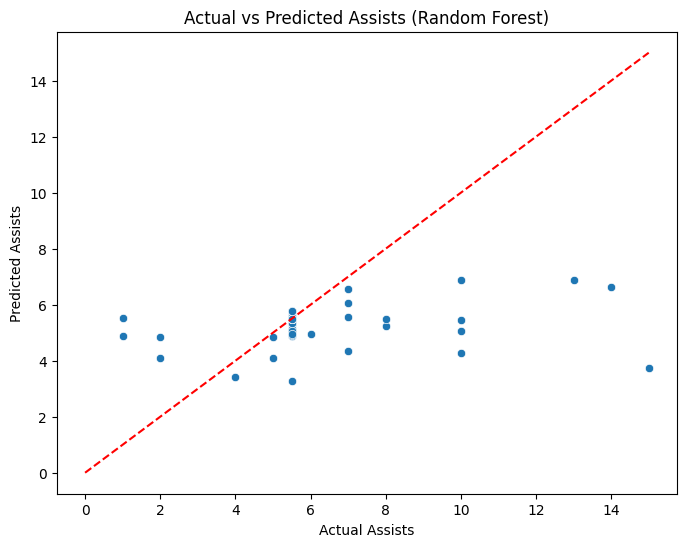

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Assists")
plt.ylabel("Predicted Assists")
plt.title("Actual vs Predicted Assists (Random Forest)")
plt.show()


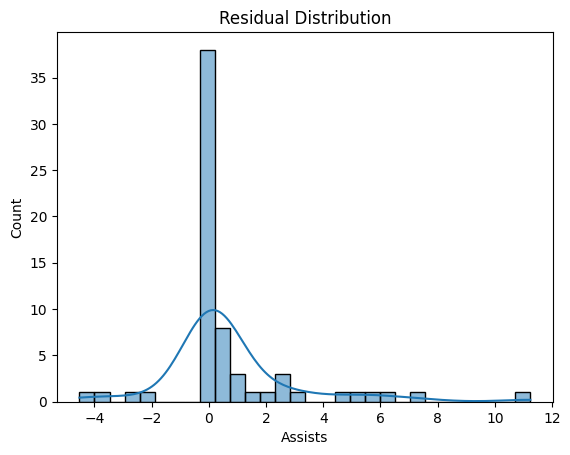

In [27]:
residuals = y_test - y_pred_rf
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()


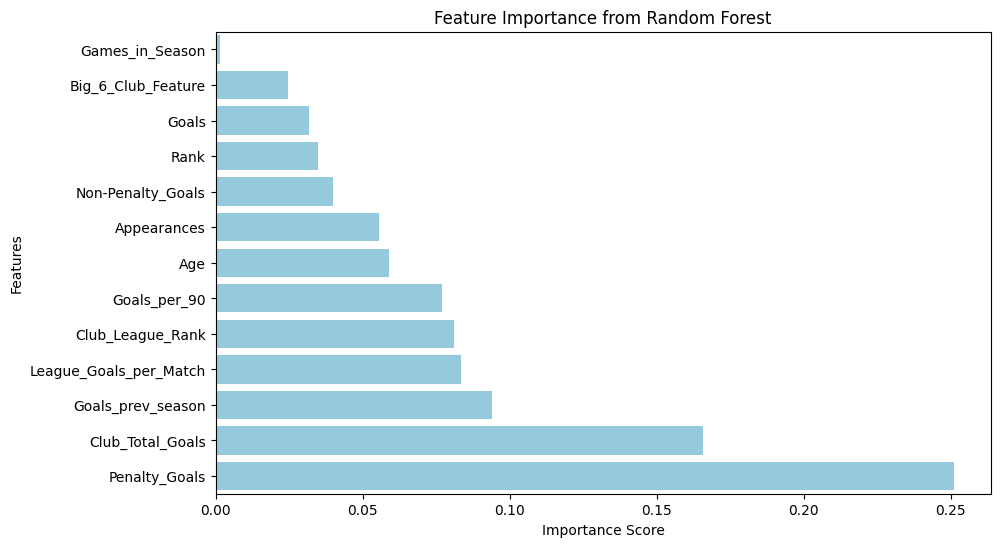

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 21: Feature Importance Visualization
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=importances[indices],
    y=features[indices],
    color="skyblue"  # single color avoids palette+hue warning
)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


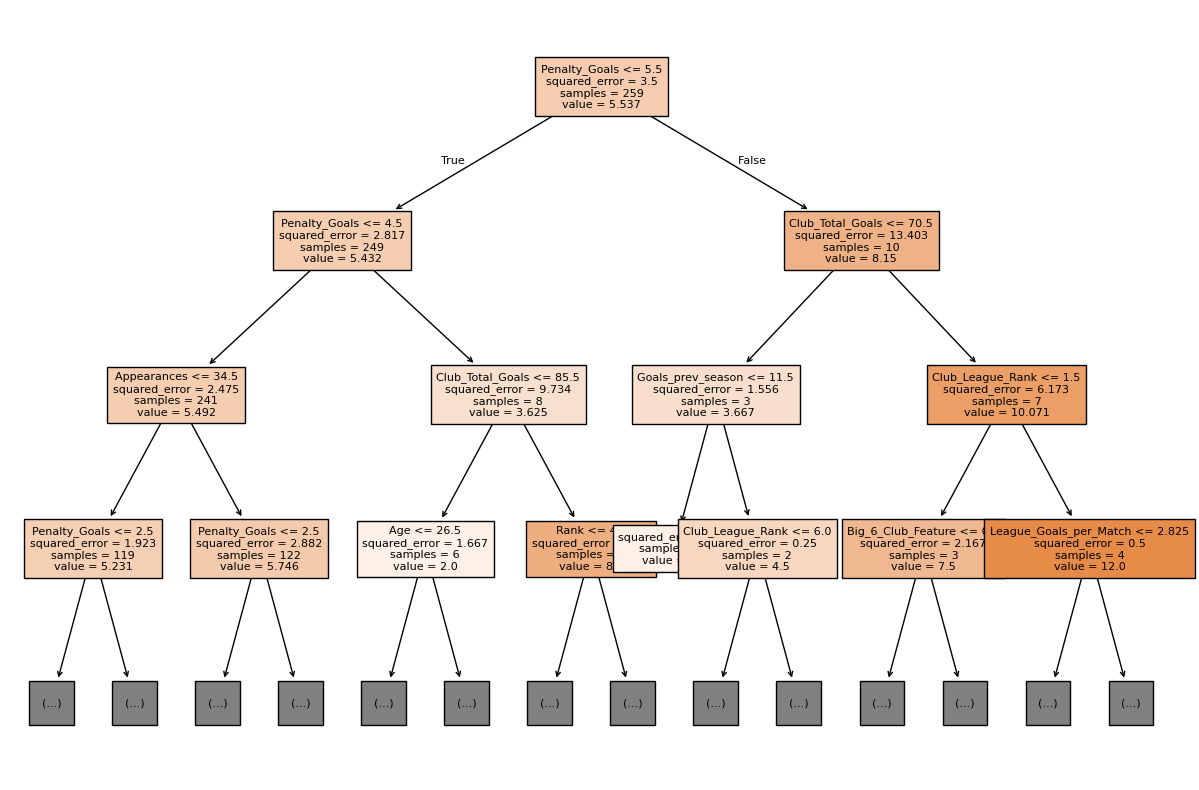

In [30]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, max_depth=3, fontsize=8)
plt.show()


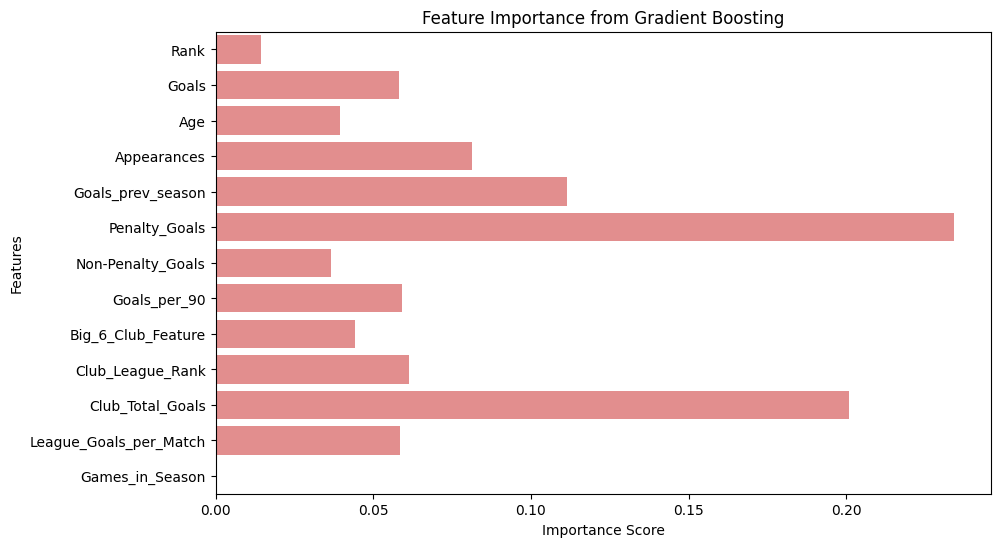

In [33]:
#  Gradient Boosting Feature Importances (Simple Fix)
gb_importances = gb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(
    x=gb_importances,
    y=features,
    color="lightcoral"  # single color, avoids palette warning
)
plt.title("Feature Importance from Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


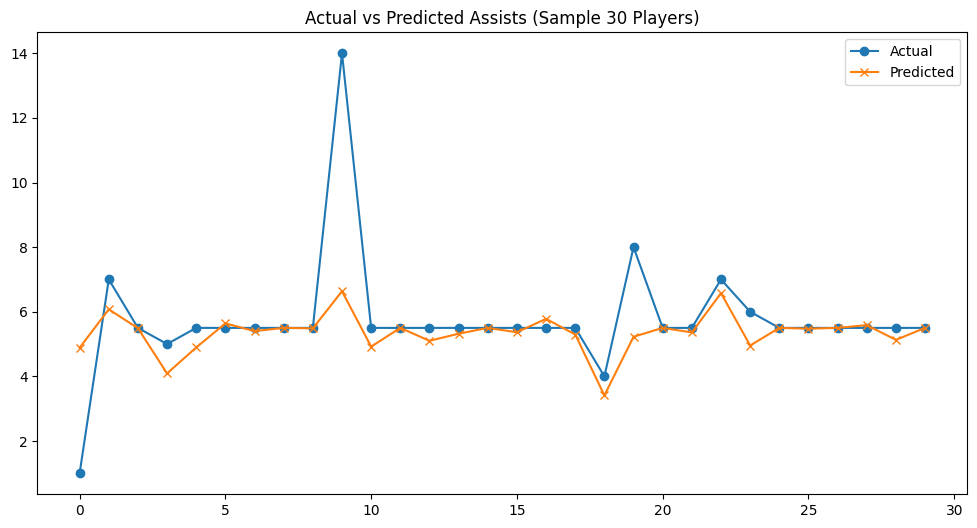

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:30], label="Actual", marker="o")
plt.plot(y_pred_rf[:30], label="Predicted", marker="x")
plt.legend()
plt.title("Actual vs Predicted Assists (Sample 30 Players)")
plt.show()


In [36]:
print(top_goals.columns)


Index(['Season', 'Rank', 'Player', 'Club', 'Goals', 'Position', 'Age',
       'Appearances', 'Goals_prev_season', 'Assists', 'Penalty_Goals',
       'Non-Penalty_Goals', 'Goals_per_90', 'Big_6_Club_Feature',
       'Club_League_Rank', 'Club_Total_Goals', 'League_Goals_per_Match',
       'Games_in_Season'],
      dtype='object')


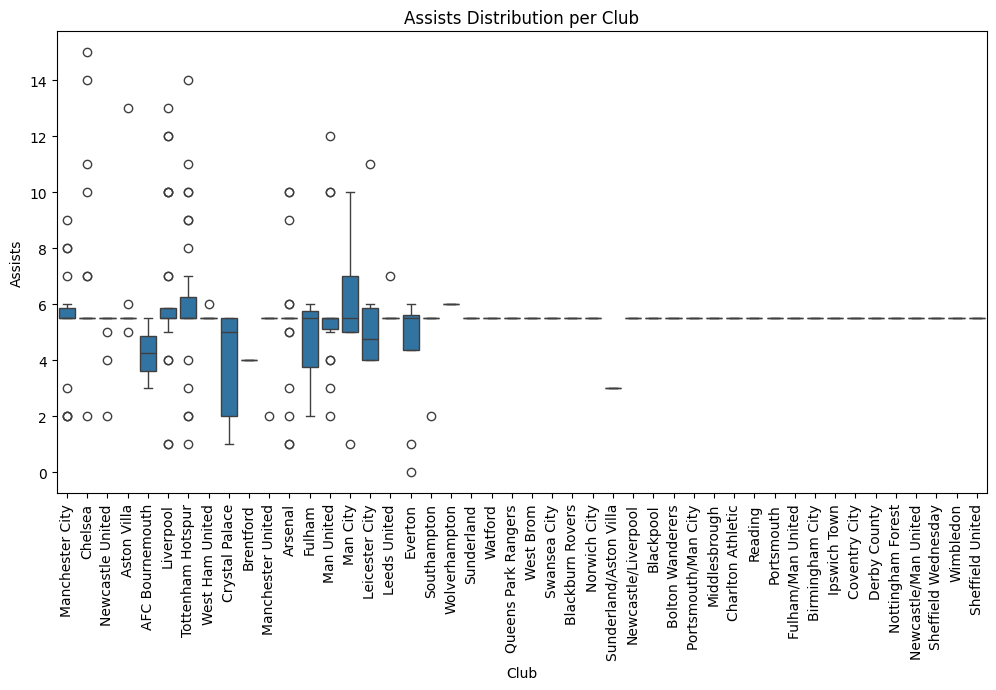

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Club", y="Assists", data=top_goals)
plt.xticks(rotation=90)
plt.title("Assists Distribution per Club")
plt.show()


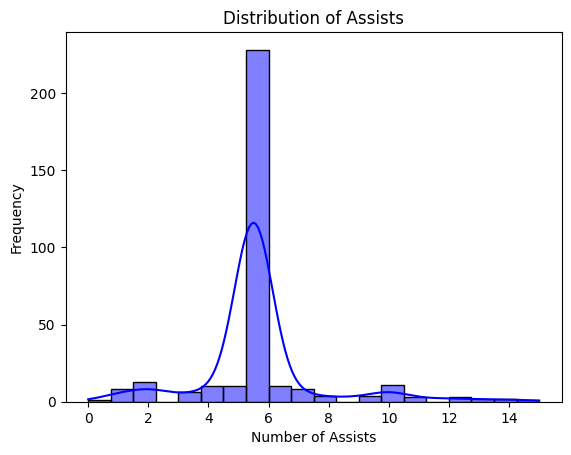

In [39]:
sns.histplot(top_goals["Assists"], bins=20, kde=True, color="blue")
plt.title("Distribution of Assists")
plt.xlabel("Number of Assists")
plt.ylabel("Frequency")
plt.show()


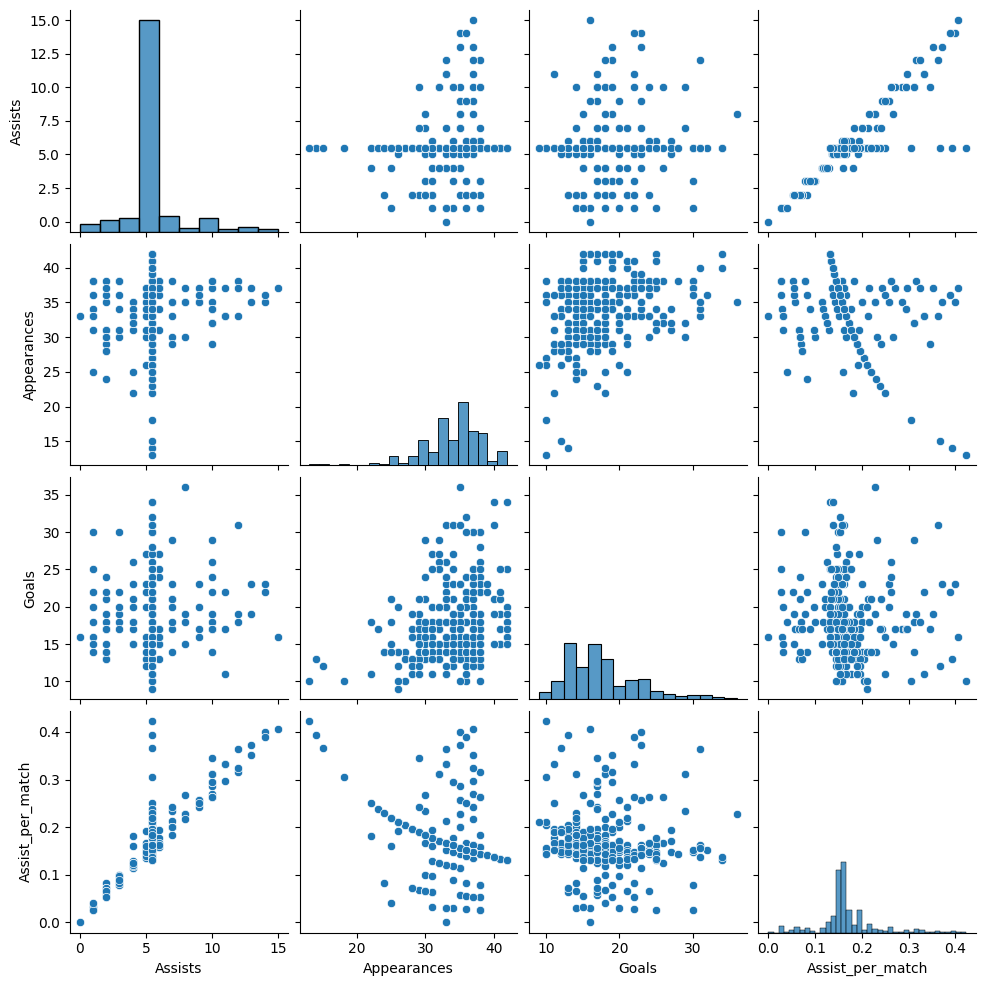

In [41]:
# Create Assist_per_match column if not already in the dataset
top_goals["Assist_per_match"] = top_goals["Assists"] / top_goals["Appearances"]

# Pairplot with correct column names
sns.pairplot(top_goals[["Assists", "Appearances", "Goals", "Assist_per_match"]])
plt.show()


In [42]:
best_model = "Random Forest"  # based on R2
print("Best Performing Model:", best_model)


Best Performing Model: Random Forest


In [44]:
top_assister_idx = np.argmax(y_pred_rf)
print("🏆 Predicted Top Assister:", top_goals.iloc[top_assister_idx]["Player"])


🏆 Predicted Top Assister: Richarlison


In [45]:
print("✅ Project Complete")
print("We predicted assists using regression models.")
print("Random Forest gave the best performance (highest R2).")
print("We also visualized residuals, feature importance, and player distributions.")


✅ Project Complete
We predicted assists using regression models.
Random Forest gave the best performance (highest R2).
We also visualized residuals, feature importance, and player distributions.
